# Solar Zenith Angle Calculator

Solar Zenith Angle ranges from 0 to 180 degrees. 0 degrees is high noon (sun directly overhead); 180 is total midnight (sun on the opposite side of the earth). Most locations will not experience either extreme due to the tilt of the Earth, etc.

## Setup Python

In [1]:
import datetime

%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import solar_zenith

## Define Locations

In [2]:
tx_call =   'WWV'
freq    =   10.000
tx_lat  =   40.679944   # WWV Lat
tx_lon  = -105.040306   # WWV Lon

rx_call =   'W8EDU'
rx_lat  =   41.501454   # CWRU Lat
rx_lon  =  -81.607368   # CWRU Lon

mids    = solar_zenith.geopack.midpoint(tx_lat,tx_lon,rx_lat,rx_lon)
mid_lat = mids[0][0]
mid_lon = mids[1][0]

sTime   = datetime.datetime(2020,1,1)
eTime   = datetime.datetime(2020,1,2)
minutes = 5

In [3]:
mpl.rcParams['font.size']      = 18
mpl.rcParams['font.weight']    = 'bold'
mpl.rcParams['axes.grid']      = True
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['figure.figsize'] = 1.5*np.array([8.0, 6.0])
mpl.rcParams['axes.xmargin']   = 0
mpl.rcParams['axes.ymargin']   = 0

## Calculate Solar Zenith Angle

In [4]:
szas = solar_zenith.calc_solar_zenith(sTime,eTime,mid_lat,mid_lon,minutes)

## Plot Result - Simple

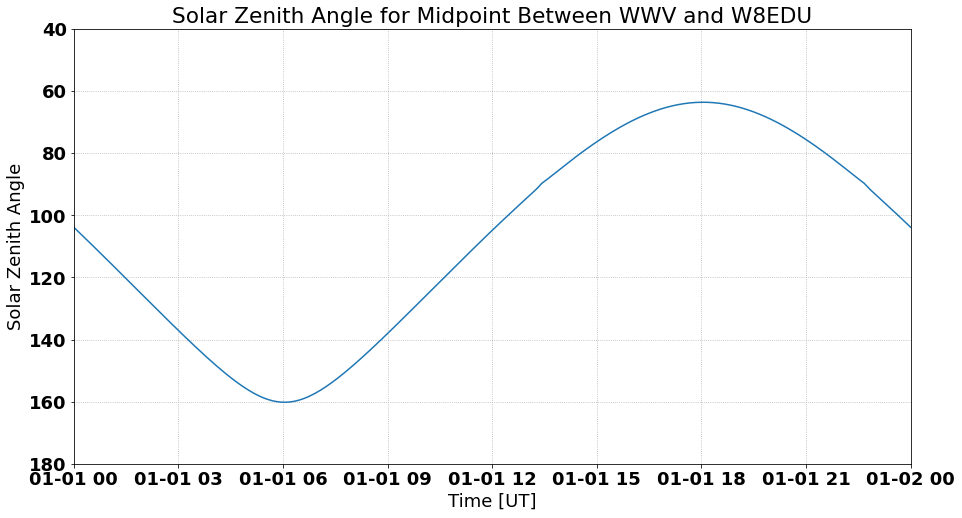

In [5]:
fig = plt.figure(figsize=(15,8))
ax  = fig.add_subplot(111)

# Plot solar Zenith Angle
xx = szas.index
yy = szas['els']
ax.plot(xx,yy)

# Set the axis limits.
ax.set_ylim(180,40) # Note scale runs backwards to place noon on top.

# Label the plot
ax.set_xlabel('Time [UT]')
ax.set_ylabel('Solar Zenith Angle')
title = 'Solar Zenith Angle for Midpoint Between {!s} and {!s}'.format(tx_call,rx_call)
ax.set_title(title)

plt.show()

## Plot Result - Fancy

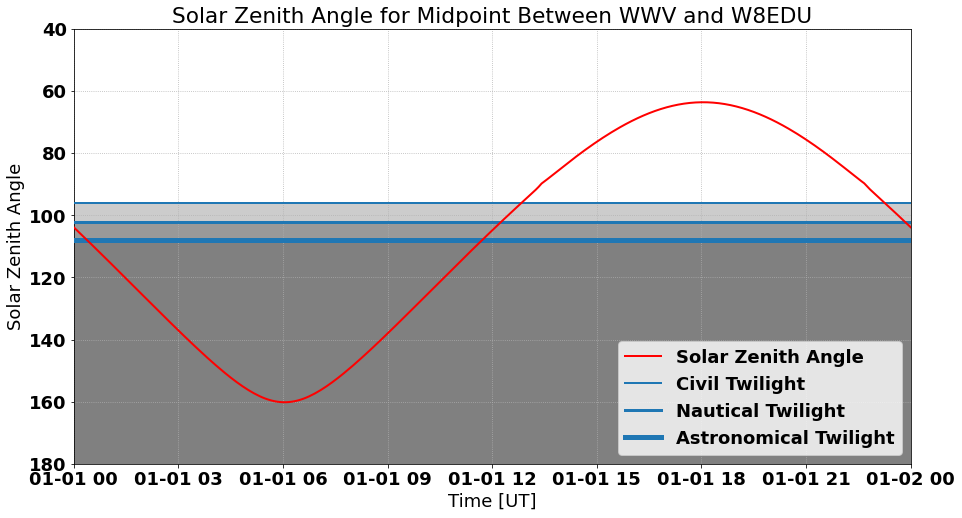

In [6]:
fig = plt.figure(figsize=(15,8))
ax  = fig.add_subplot(111)

# Plot solar Zenith Angle
xx = szas.index
yy = szas['els']
ax.plot(xx,yy,lw=2,color='red',label='Solar Zenith Angle',zorder=100)

# Plot Twilight Values
ax.axhline(90 +  6, lw=2, zorder=50, label='Civil Twilight')
ax.axhline(90 + 12, lw=3, zorder=50, label='Nautical Twilight')
ax.axhline(90 + 18, lw=5, zorder=50, label='Astronomical Twilight')

ax.fill_between(xx,90 +  6,180,facecolor='0.80') # Civil Twilight
ax.fill_between(xx,90 + 12,180,facecolor='0.60') # Nautical Twilight
ax.fill_between(xx,90 + 18,180,facecolor='0.50') # Astronomical Twilight

# Create a legend
ax.legend(loc='lower right')

# Set the axis limits.
ax.set_ylim(180,40) # Note scale runs backwards to place noon on top.

# Label the plot
ax.set_xlabel('Time [UT]')
ax.set_ylabel('Solar Zenith Angle')
title = 'Solar Zenith Angle for Midpoint Between {!s} and {!s}'.format(tx_call,rx_call)
ax.set_title(title)

plt.show()